In [1]:
%load_ext autoreload
%autoreload 2

## import all necessary modules

In [2]:
# from third party libs
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## define useful functions

In [3]:
def show_data(x, y, n):
    for a, b in zip(x[:n], y[:n]):
        print(a, b)
    return

def group_age(x):
    if 18 <= x <= 25:
        return 0
    elif 26 <= x <= 33:
        return 1
    elif 34 <= x <= 41:
        return 2
    elif 42 <= x <= 49:
        return 3
    elif 50 <= x <= 60:
        return 4
    elif x > 60:
        return 5
    else:
        print(f"Unexpected datapoint '{x}' in Age")
        return -1

def group_employed(x):
    if x == "yes":
        return 1
    elif x == "no":
        return 0
    else:
        print(f"Unexpected datapoint '{x}' in Employed")
        return -1

def group_household_size(x):
    if x > 4:
        return 2
    elif x == 4:
        return 1
    elif x < 4:
        return 0
    else:
        print(f"Unexpected datapoint '{x}' in Household size")
        return x
    
def group_benefit(x):
    if x < 1500:
        return 0
    elif x == 1500:
        return 1
    elif x > 1500:
        return 2
    else:
        print(f"Unexpected datapoint '{x}' in Benefit")
        return x

## load dataset

In [4]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Age,Household_size,Employed,label
0,26,5,yes,0
1,65,3,no,0
2,45,3,yes,0
3,25,4,yes,0
4,73,5,no,0


## Prepare data

In [5]:
X = dataset[["Age", "Household_size", "Employed"]].to_numpy()

# turn yes to 1 and no to 0
X[:, 2] = np.vectorize(group_employed)(X[:, 2])

Y = 100 * X.mean(1)#dataset["label"]

show_data(X, Y, 10)

[26 5 1] 1066.6666666666665
[65 3 0] 2266.666666666667
[45 3 1] 1633.3333333333333
[25 4 1] 1000.0
[73 5 0] 2600.0
[74 4 0] 2600.0
[90 4 0] 3133.333333333333
[34 3 1] 1266.6666666666665
[28 4 1] 1100.0
[32 2 0] 1133.3333333333335


In [6]:
X_group = X.copy()
Y_group = Y.copy()

# group age
X_group[:, 0] = np.vectorize(group_age)(X[:, 0])

# group house hold size
X_group[:, 1] = np.vectorize(group_household_size)(X[:, 1])


Y_group = np.vectorize(group_benefit)(Y)
num_of_classes = len(np.unique(Y_group))

show_data(X_group, Y_group, 10)

[1 2 1] 0
[5 0 0] 2
[3 0 1] 2
[0 1 1] 0
[5 2 0] 2
[5 1 0] 2
[5 1 0] 2
[2 0 1] 0
[1 1 1] 0
[1 0 0] 0


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_group, test_size=0.33, random_state=42)

Text(0.5, 1.0, 'Benefit against Age Group')

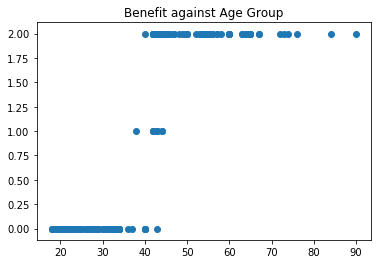

In [14]:
plt.scatter(X[:, 0], Y_group)
plt.title("Benefit against Age Group")

Text(0.5, 1.0, 'Benefit against HouseHold Size Group')

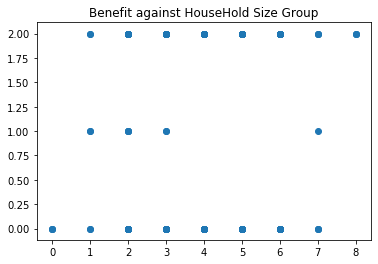

In [15]:
plt.scatter(X[:, 1], Y_group)
plt.title("Benefit against HouseHold Size Group")

Text(0.5, 1.0, 'Benefit against Employed Group')

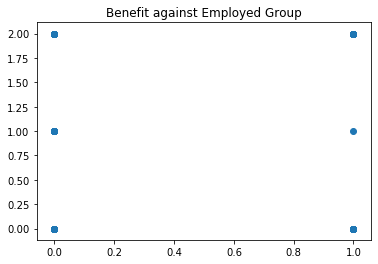

In [16]:
plt.scatter(X[:, 2], Y_group)
plt.title("Benefit against Employed Group")

## Prep K-Means Algorithm

In [17]:
kmeans = KMeans(n_clusters=num_of_classes, random_state=0)

## Run the model

In [19]:
kmeans = kmeans.fit(X)

## Analyse result

In [20]:
kmeans.labels_[:10]

array([0, 1, 2, 0, 1, 1, 1, 0, 0, 0])

In [21]:
kmeans.cluster_centers_

array([[27.47169811,  3.81132075,  0.46226415],
       [59.4516129 ,  3.85483871,  0.5       ],
       [43.6625    ,  3.9       ,  0.45      ]])

In [23]:
kmeans_y_pred = kmeans.predict(x_test)
kmeans_y_pred[:10]

array([1, 1, 0, 1, 2, 0, 1, 0, 0, 2])

In [24]:
# print(confusion_matrix(y_test, kmeans_y_pred))

In [25]:
# print(classification_report(y_test, kmeans_y_pred))

Benefit against Age Group


Text(0.5, 1.0, 'Kmeans')

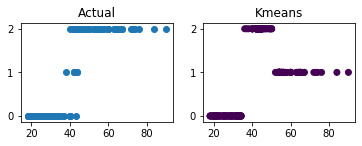

In [33]:
print("Benefit against Age Group")

plt.subplot(221)
plt.scatter(X[:, 0], Y_group)
plt.title("Actual")

plt.subplot(222)
plt.scatter(X[:, 0], kmeans.labels_, c=10+np.zeros(len(X)))
plt.title("Kmeans")

Benefit against HouseHold Size Group


Text(0.5, 1.0, 'Kmeans')

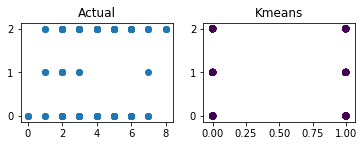

In [36]:
print("Benefit against HouseHold Size Group")

plt.subplot(221)
plt.scatter(X[:, 1], Y_group)
plt.title("Actual")

plt.subplot(222)
plt.scatter(X[:, 2], kmeans.labels_, c=10+np.zeros(len(X)))
plt.title("Kmeans")

Benefit against Employed Group


Text(0.5, 1.0, 'Kmeans')

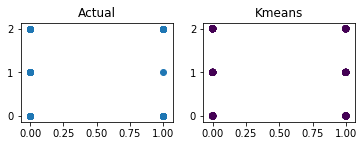

In [35]:
print("Benefit against Employed Group")

plt.subplot(221)
plt.scatter(X[:, 2], Y_group)
plt.title("Actual")

plt.subplot(222)
plt.scatter(X[:, 2], kmeans.labels_, c=10+np.zeros(len(X)))
plt.title("Kmeans")

## prep SVM

In [55]:
svclassifier = SVC(kernel='ploy', gamma="auto", degree=num_of_classes)

## Run SVM model

In [40]:
svclassifier_y_pred = svclassifier.fit(x_train, y_train)

## Analyse result

In [41]:
svclassifier_y_pred = svclassifier.predict(x_test)

In [42]:
print(confusion_matrix(y_test, svclassifier_y_pred))

[[37  0  1]
 [ 0  0  5]
 [ 0  0 39]]


In [43]:
print(classification_report(y_test, svclassifier_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.00      0.00      0.00         5
           2       0.87      1.00      0.93        39

   micro avg       0.93      0.93      0.93        82
   macro avg       0.62      0.66      0.64        82
weighted avg       0.88      0.93      0.90        82



c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
xx, yy = x_test, y_test
zz = svclassifier.predict(xx)

Benefit against Age Group


Text(0.5, 1.0, 'SVM')

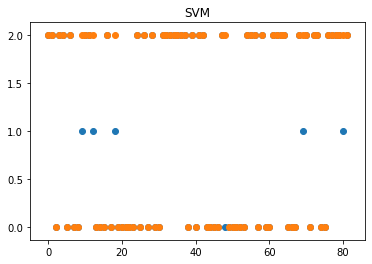

In [54]:
print("Benefit against Age Group")

plt.scatter(np.arange(len(yy)), yy)
plt.scatter(np.arange(len(yy)), zz)
plt.title("SVM")

Benefit against HouseHold Size Group


Text(0.5, 1.0, 'Kmeans')

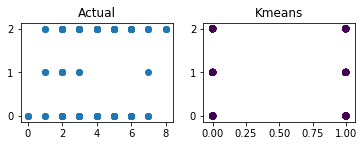

In [36]:
print("Benefit against HouseHold Size Group")

plt.subplot(221)
plt.scatter(X[:, 1], Y_group)
plt.title("Actual")

plt.subplot(222)
plt.scatter(X[:, 2], kmeans.labels_, c=10+np.zeros(len(X)))
plt.title("Kmeans")

Benefit against Employed Group


Text(0.5, 1.0, 'Kmeans')

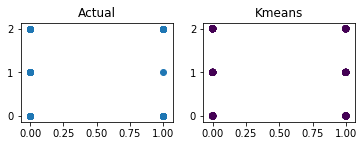

In [35]:
print("Benefit against Employed Group")

plt.subplot(221)
plt.scatter(X[:, 2], Y_group)
plt.title("Actual")

plt.subplot(222)
plt.scatter(X[:, 2], kmeans.labels_, c=10+np.zeros(len(X)))
plt.title("Kmeans")

Text(0.5, 1.0, 'Benefit against Age Group')

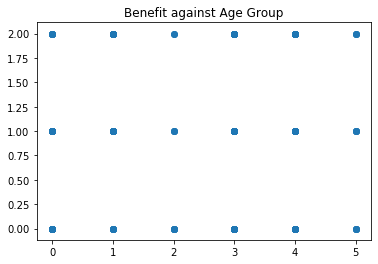

In [69]:
Benefit against HouseHold Size Group

Text(0.5, 1.0, 'Benefit against HouseHold Size Group')

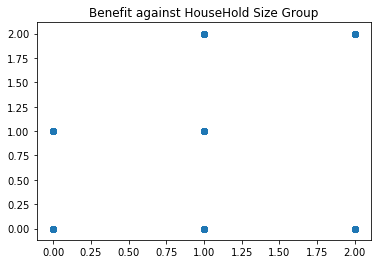

In [63]:
plt.scatter(x_train[:, 1], kmeans.labels_)
plt.title("Benefit against HouseHold Size Group")

Text(0.5, 1.0, 'Benefit against Employed Group')

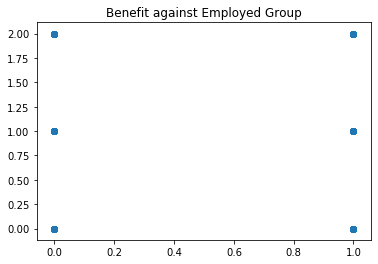

In [64]:
plt.scatter(x_train[:, 2], kmeans.labels_)
plt.title("Benefit against Employed Group")